In [11]:
# Set Variables and Import

import pickle
import os
from matplotlib import pyplot as plt

root_folder = '/home/Medalia/BWimmer/Benedikt/04_SFB/04_AlphaFold/210924_mSFB_SLayer_candidates/AID44313/AID44313'

Working on model 1


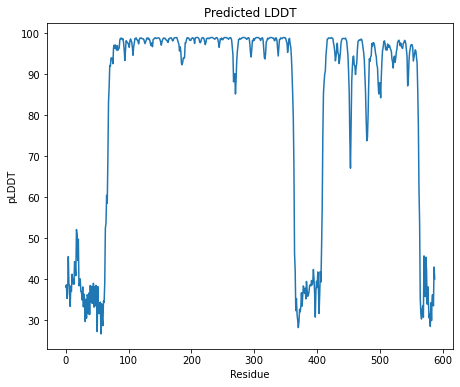

In [28]:
# Go through all models

os.chdir(root_folder)

for model in range(1,2,1):
    print(f"Working on model {model}")

    pklfile = "result_model_" + str(model) + ".pkl"
    exportfile = "plot_model_" + str(model) + ".pdf"
    
    with open(pklfile, 'rb') as f:
        data = pickle.load(f)
        
    data.keys()
    
    plddt = data["plddt"]

    plt.figure(figsize=[8 * 2, 6])
    plt.subplot(1, 2, 1)
    plt.plot(plddt)
    plt.title('Predicted LDDT')
    plt.xlabel('Residue')
    plt.ylabel('pLDDT')
    
    def plot_plddt_legend():
      """Plots the legend for pLDDT."""
      thresh = ['Very low (pLDDT < 50)',
            'Low (70 > pLDDT > 50)',
            'Confident (90 > pLDDT > 70)',
            'Very high (pLDDT > 90)']

      colors = [x[2] for x in PLDDT_BANDS]

      plt.figure(figsize=(2, 2))
      for c in colors:
        plt.bar(0, 0, color=c)
      plt.legend(thresh, frameon=False, loc='center', fontsize=20)
      plt.xticks([])
      plt.yticks([])
      ax = plt.gca()
      ax.spines['right'].set_visible(False)
      ax.spines['top'].set_visible(False)
      ax.spines['left'].set_visible(False)
      ax.spines['bottom'].set_visible(False)
      plt.title('Model Confidence', fontsize=20, pad=20)
      return plt
    

In [25]:
    pae_output = (data['predicted_aligned_error'],
              data['max_predicted_aligned_error'])

    plt.subplot(1, 2, 2)
    pae, max_pae = pae_output
    plt.imshow(pae, vmin=0., vmax=max_pae, cmap='Greens_r')
    plt.colorbar(fraction=0.046, pad=0.04)

    plt.title('Predicted Aligned Error')
    plt.xlabel('Scored residue')
    plt.ylabel('Aligned residue')

KeyError: 'predicted_aligned_error'

In [ ]:
pae_output = (data['predicted_aligned_error'],
              data['max_predicted_aligned_error'])

plt.subplot(1, 2, 2)
pae, max_pae = pae_output
plt.imshow(pae, vmin=0., vmax=max_pae, cmap='Greens_r')
plt.colorbar(fraction=0.046, pad=0.04)

plt.title('Predicted Aligned Error')
plt.xlabel('Scored residue')
plt.ylabel('Aligned residue')
plt.savefig(path + "score" + filename)

view = py3Dmol.view(width=400, height=300)
view.addModelsAsFrames(system)
view.setStyle({'model': -1}, {"cartoon": {'color': 'spectrum'}})
view.zoomTo()
view.show()

show_sidechains = True

to_visualize_pdb = system

# Color the structure by per-residue pLDDT
color_map = {i: bands[2] for i, bands in enumerate(PLDDT_BANDS)}
view = py3Dmol.view(width=800, height=600)
view.addModelsAsFrames(to_visualize_pdb)
style = {'cartoon': {'colorscheme': {'prop': 'b', 'map': color_map}}}
if show_sidechains:
  style['stick'] = {}
view.setStyle({'model': -1}, style)
view.zoomTo()

grid = GridspecLayout(1, 2)
out = Output()
with out:
  view.show()
grid[0, 0] = out

out = Output()
with out:
  plot_plddt_legend().show()
grid[0, 1] = out

display.display(grid)